In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
from adjustText import adjust_text
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset = 'salary_year_avg')

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(10)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
180,90250.0,powerpoint
410,133285.0,sql
410,133285.0,word
410,133285.0,excel
410,133285.0,visio


In [10]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)
df_DA_skills = df_DA_skills.rename(columns = {'count': 'skill_count', 'median': 'median_salary'})
df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


In [12]:
df_DA_count = len(df_DA_US)
df_DA_count

4350

In [15]:
df_DA_skills['skills_percent'] = df_DA_skills['skill_count']/df_DA_count*100
df_DA_skills

,skill_count,median_salary,skills_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


In [44]:
skills_percent = 5
df_DA_skill_high_demand = df_DA_skills[df_DA_skills['skills_percent'] > skills_percent]
df_DA_skill_high_demand

,skill_count,median_salary,skills_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


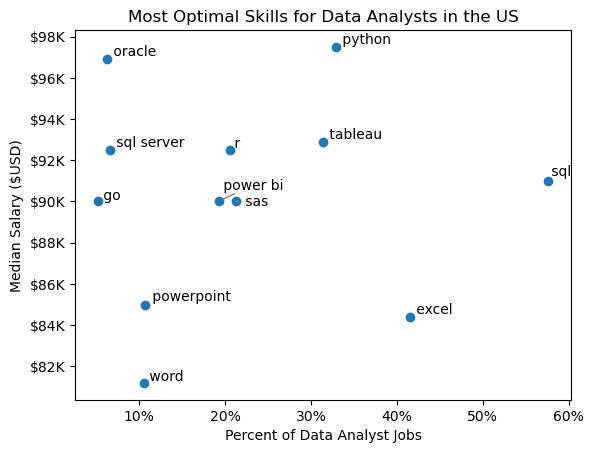

In [45]:
from adjustText import adjust_text
plt.scatter(df_DA_skill_high_demand['skills_percent'], df_DA_skill_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))
 # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skill_high_demand.index):
    texts.append(plt.text(df_DA_skill_high_demand['skills_percent'].iloc[i], df_DA_skill_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

In [46]:
df_technology = df['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()
df_technology

#combine all dictionaries in df_technology into one dictionary
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key]+= value
        else:
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['excel',
  'outlook',
  'qlik',
  'datarobot',
  'ms access',
  'msaccess',
  'sheets',
  'ssrs',
  'sas',
  'power bi',
  'looker',
  'sharepoint',
  'cognos',
  'visio',
  'alteryx',
  'esquisse',
  'powerbi',
  'sap',
  'spss',
  'splunk',
  'ssis',
  'tableau',
  'nuix',
  'spreadsheet',
  'microstrategy',
  'word',
  'dax',
  'powerpoint'],
 'programming': ['erlang',
  'swift',
  'sql',
  'nosql',
  'css',
  'delphi',
  'c++',
  'java',
  'groovy',
  'clojure',
  'mongo',
  'powershell',
  'sas',
  'solidity',
  'lisp',
  'ruby',
  'sass',
  'r',
  'mongodb',
  'perl',
  'golang',
  'vb.net',
  'javascript',
  'vba',
  'typescript',
  'c',
  'shell',
  'fortran',
  'assembly',
  'objective-c',
  'crystal',
  'haskell',
  't-sql',
  'html',
  'rust',
  'no-sql',
  'ocaml',
  'visualbasic',
  'scala',
  'php',
  'c#',
  'cobol',
  'pascal',
  'lua',
  'matlab',
  'elixir',
  'go',
  'apl',
  'python',
  'julia',
  'visual basic',
  'dart',
  'bash',
  'kotlin',
  

In [49]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns = ['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology


,technology,skills
0,analyst_tools,excel
0,analyst_tools,outlook
0,analyst_tools,qlik
0,analyst_tools,datarobot
0,analyst_tools,ms access
...,...,...
9,sync,google chat
9,sync,wire
9,sync,zoom
9,sync,symphony


In [ ]:
df_skill_tech = df_DA_skill_high_demand.merge(df_technology, left_on = 'job_skills', right_on = 'skills')
df_skill_tech

,skill_count,median_salary,skills_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


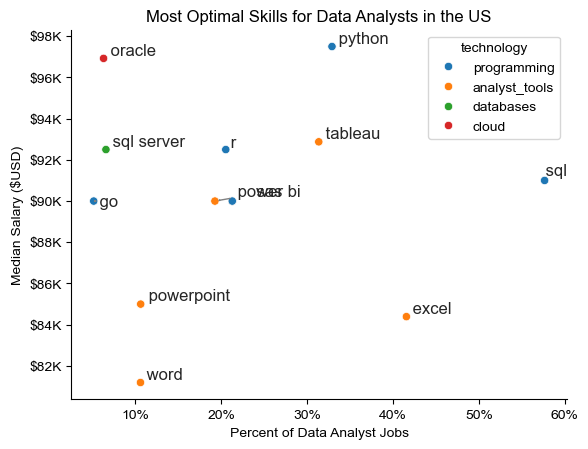

In [58]:
from adjustText import adjust_text
#plt.scatter(df_skill_tech['skills_percent'], df_skill_tech['median_salary'])
sns.scatterplot(
    data = df_skill_tech,
    x = 'skills_percent',
    y = 'median_salary',
    hue = 'technology' # adding hue to technology column to color the points by technology
)

sns.despine()
sns.set(style="ticks")

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))
 # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skill_high_demand.index):
    texts.append(plt.text(df_DA_skill_high_demand['skills_percent'].iloc[i], df_DA_skill_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()